# Homework 5: Clustering

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [2]:
MY_UNIQNAME = 'shruthis'

# Part 1: Clustering Music Preferences

In another class, students were asked about their music preferences by rating each of 11 music genres on a 
scale from 1 (=no way) to 10 (=love it).  The de-indentified results are in the data/music.csv file distributed with this
assignment.

In [117]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns
%matplotlib inline

In [118]:
music = pd.read_csv('music.csv')

In [119]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,Muriel,8,7,2,6,8,8,7,6,8,9,9
1,Alexis,4,10,4,3,3,1,10,4,6,5,8
2,Alison,5,10,6,2,3,1,5,6,6,3,5
3,Christopher,3,3,4,3,7,10,2,6,9,8,7
4,Merle,3,3,4,5,6,6,6,4,5,5,6


In [120]:
music_ed = music.drop(columns=['Name'])
music_ed.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,8,7,2,6,8,8,7,6,8,9,9
1,4,10,4,3,3,1,10,4,6,5,8
2,5,10,6,2,3,1,5,6,6,3,5
3,3,3,4,3,7,10,2,6,9,8,7
4,3,3,4,5,6,6,6,4,5,5,6


Your goal for this assignment will be to cluster these preferences using a variety of techniques, including one new one.

### Q1 (40 points). Perform K-means clustering on the music preference data
- Identify the best *k* by using methods that we covered from the lab.
- Plot your results and provide your interpretations.
    - What do you like/dislike about the results?
    - What would improve the results?
    - Explain why.


In [121]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
data = scale(music_ed)
# print(digits.data)
print(data)

[[ 2.36912976  1.17018869 -0.65400571  0.01102703  1.99608082  0.13373327
   0.81217287  0.95651261  0.68849345  0.97968291  1.53753315]
 [ 0.17505885  2.53379699  0.22423053 -1.54378382 -0.22704237 -2.61615717
   2.04353174  0.02958286 -0.27745258 -0.82600716  1.00617978]
 [ 0.72357658  2.53379699  1.10246676 -2.0620541  -0.22704237 -2.61615717
  -0.00873304  0.95651261 -0.27745258 -1.72885219 -0.58788032]
 [-0.37345888 -0.64795572  0.22423053 -1.54378382  1.55145618  0.91941626
  -1.24009191  0.95651261  1.17146647  0.52826039  0.47482641]
 [-0.37345888 -0.64795572  0.22423053 -0.50724326  1.10683155 -0.65194971
   0.40171991  0.02958286 -0.7604256  -0.82600716 -0.05652695]
 [-0.37345888 -1.10249182  1.10246676 -0.50724326 -0.67166701 -0.65194971
  -1.24009191 -1.36081176  1.17146647  0.52826039 -0.05652695]
 [-1.47049433 -1.55702792 -0.65400571  0.52929731 -1.11629164 -0.25910822
  -1.65054487 -1.36081176  1.17146647  1.43110542 -2.18194042]
 [-0.37345888 -0.19341962  0.22423053 -0.

In [122]:
n_samples, n_features = data.shape
print(n_samples, n_features)

47 11


In [123]:
from sklearn import metrics
np.sqrt(n_samples/2)

4.847679857416329

(1, 15.45)

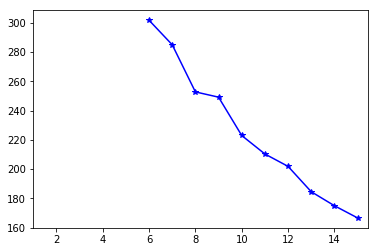

In [231]:
cost = []
for k in range(6,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)
    
fig, ax = plt.subplots()
plt.plot(range(6,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

(1, 15.45)

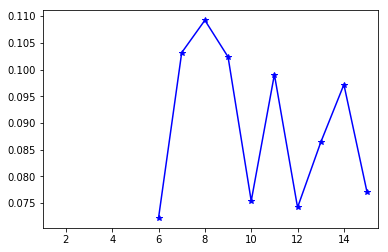

In [125]:
cost = []
for k in range(6,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))
    
fig, ax = plt.subplots()
plt.plot(range(6,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])
    

3 methods were utilized to calculate the number of clusters, k: rule of thumb, elbow method, and silhouette method. The Rule of Thumb revealed k = 4.85, the plot for The Elbow Method indicated k = between 8-9, and the The Silhouette Method indicates that k = approximately 8. I would use the Silhouette Method to estimate the best value of k, since the graph more clearly depicts the average silhouette of the data for the chosen range of values of k, and this makes it easier to choose the maximum.

Although the ranges for k obtained using the Elbow and Silhouette methods were fairly similar, the Elbow Method seemed quite subjective in the range of k values chosen for plotting, and the graph itself seemed quite open to interpretation since a clear elbow was not always evident. I am also curious as to why changing the range of k values for both methods significantly changes the plots and subsequent interpretations.

To improve the results of the optimal k value, it would be helpful to increase the number of observations, or in this case a greater sample of students' music preferences, and possibly adjusting the range of k values when utilizing both clustering methods until a clearer optimum is indicated.


### Q2 (40 points). Perform hierarchical clustering on the music preference data
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(data)
print(dist)

[[ 0.00000000e+00  7.56624739e-01  9.37156766e-01 ...  7.83890174e-01
   9.45733981e-01  8.00494256e-01]
 [ 7.56624739e-01  2.22044605e-16  2.14638871e-01 ...  9.33250660e-01
   7.20978019e-01  8.86171173e-01]
 [ 9.37156766e-01  2.14638871e-01 -2.22044605e-16 ...  1.09970094e+00
   7.66517870e-01  9.34528501e-01]
 ...
 [ 7.83890174e-01  9.33250660e-01  1.09970094e+00 ...  1.11022302e-16
   9.39607355e-01  1.32810367e+00]
 [ 9.45733981e-01  7.20978019e-01  7.66517870e-01 ...  9.39607355e-01
   1.11022302e-16  1.02504006e+00]
 [ 8.00494256e-01  8.86171173e-01  9.34528501e-01 ...  1.32810367e+00
   1.02504006e+00  0.00000000e+00]]


/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


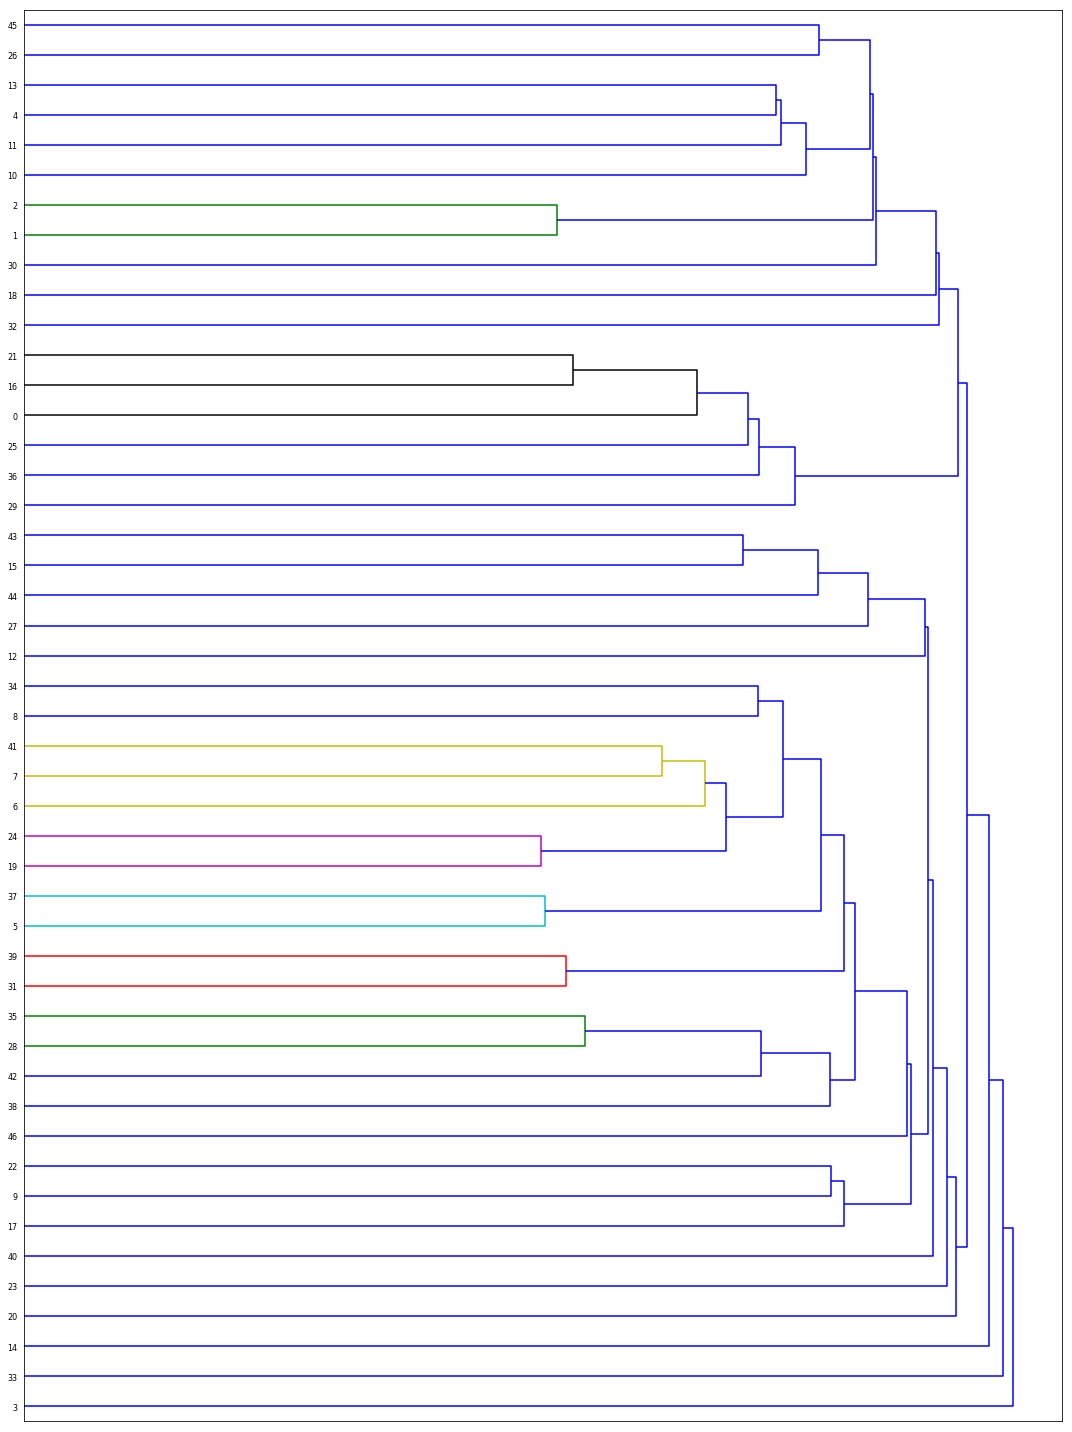

In [127]:
from scipy.cluster.hierarchy import single, dendrogram

linkage_matrix1 = single(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix1, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


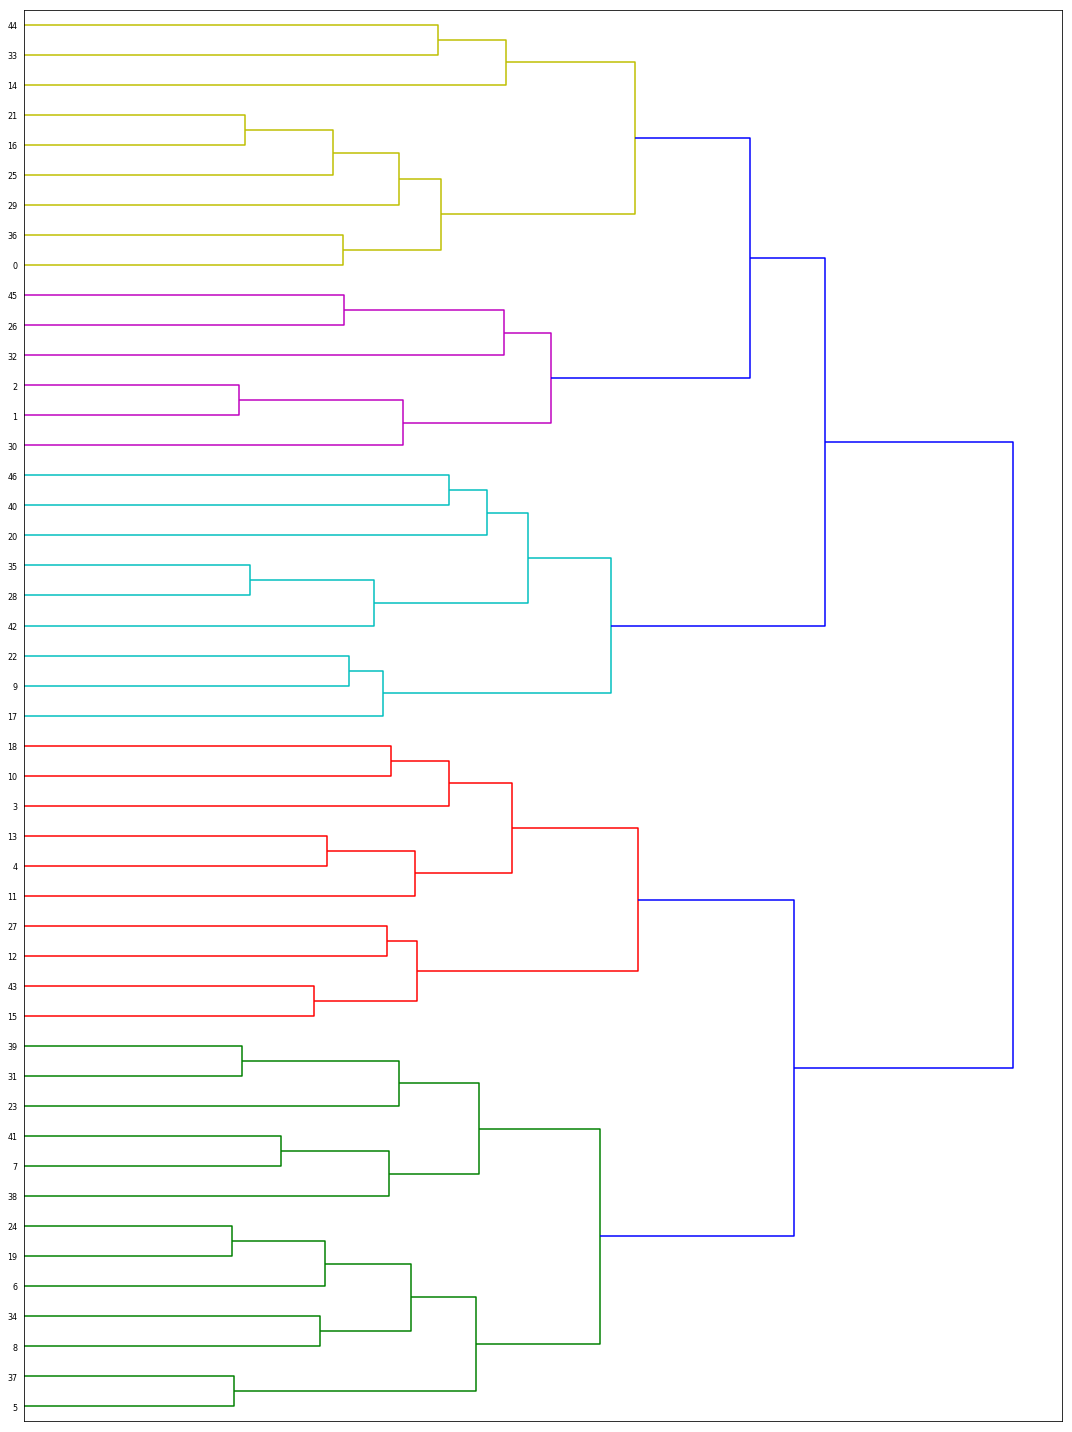

In [128]:
from scipy.cluster.hierarchy import complete, dendrogram

linkage_matrix2 = complete(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix2, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


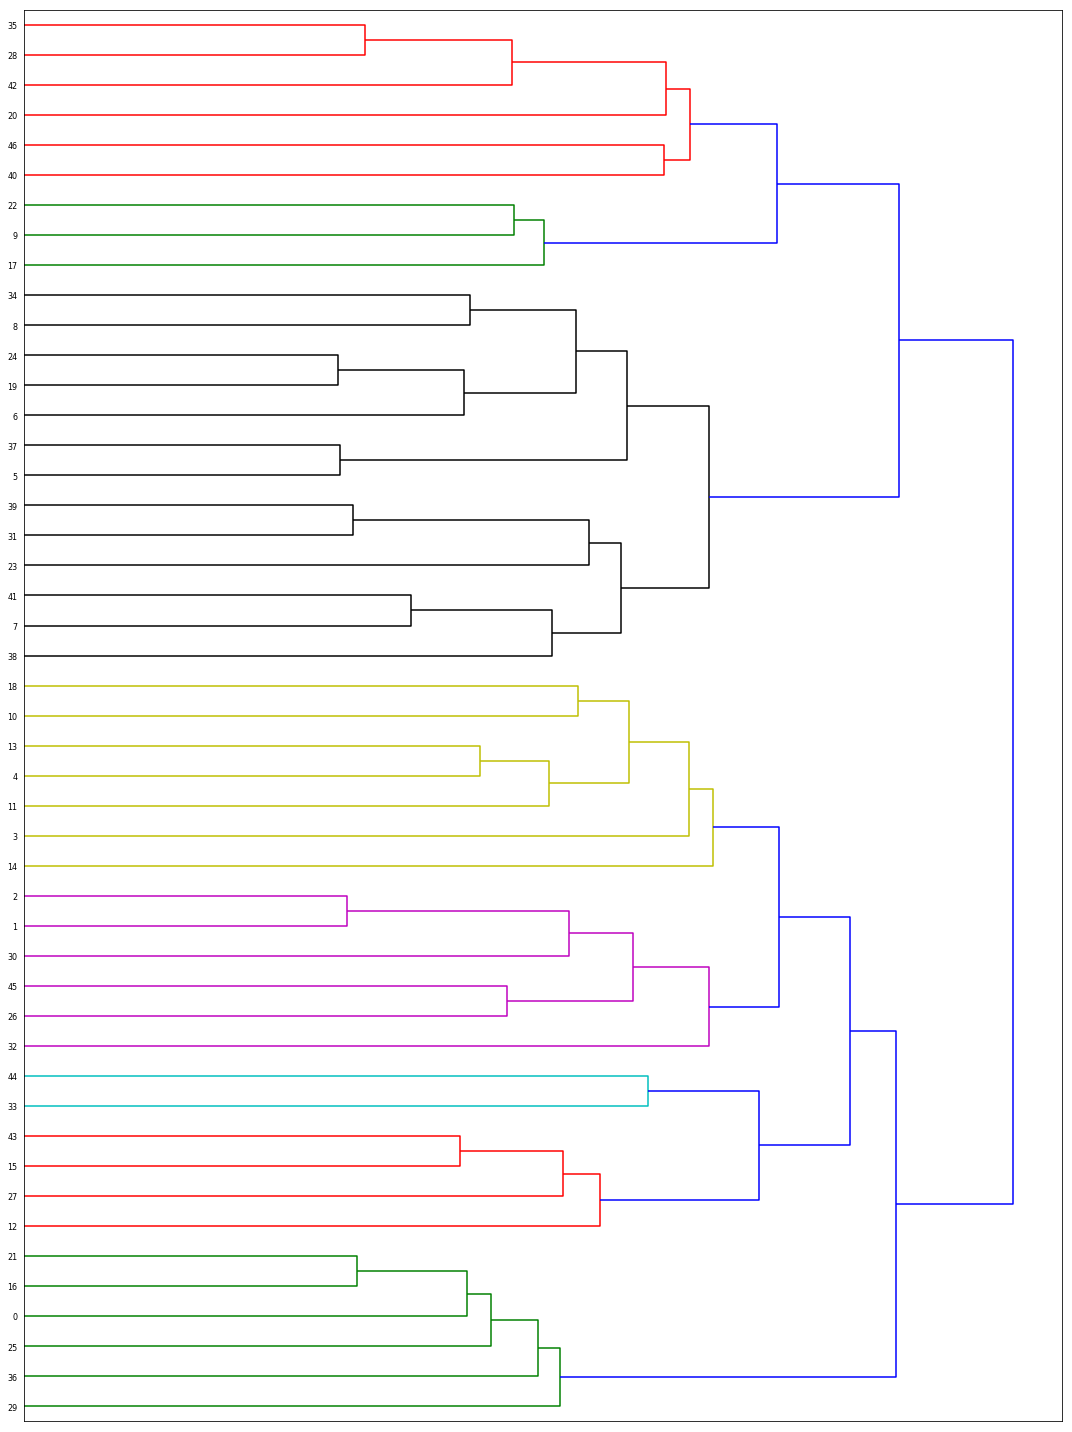

In [129]:
from scipy.cluster.hierarchy import average, dendrogram

linkage_matrix3 = average(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix3, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shruthisubramaniam/anaconda3/envs/si618/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


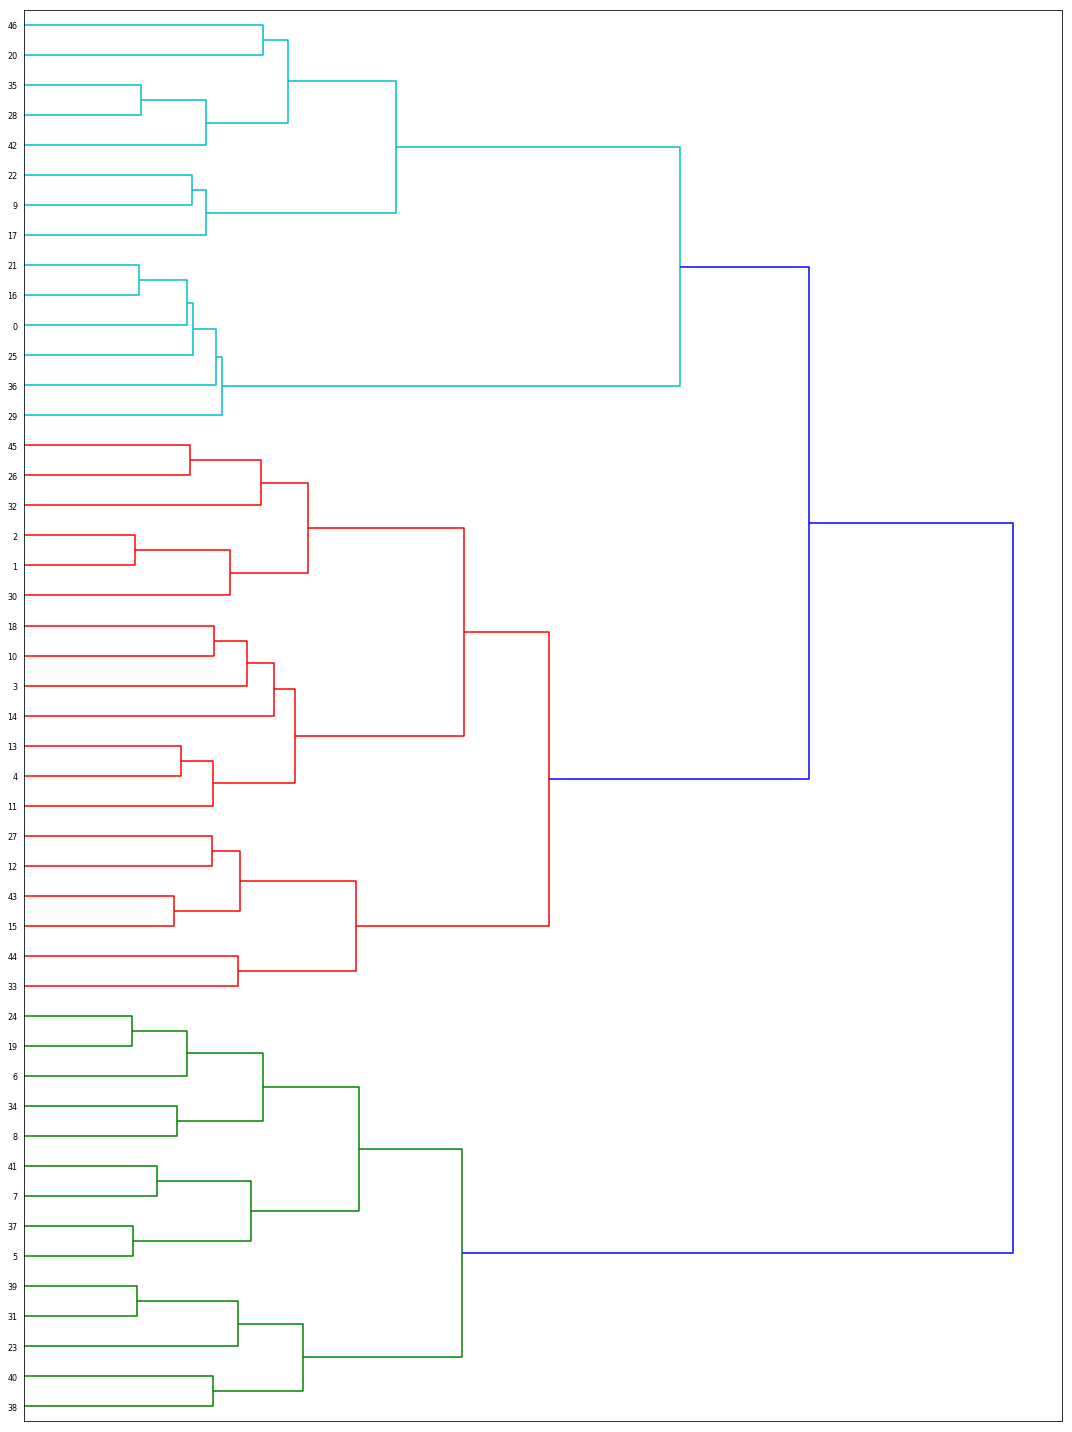

In [130]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix4 = ward(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix4, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

In [232]:
from scipy.cluster.hierarchy import fcluster
array = fcluster(linkage_matrix4, 3, criterion='maxclust')
array

array([3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3,
       3, 1, 1, 3, 2, 2, 3, 3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1, 1, 3, 2,
       2, 2, 3], dtype=int32)

In [233]:
music["cluster"] = array

In [234]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock,cluster
0,Muriel,8,7,2,6,8,8,7,6,8,9,9,3
1,Alexis,4,10,4,3,3,1,10,4,6,5,8,2
2,Alison,5,10,6,2,3,1,5,6,6,3,5,2
3,Christopher,3,3,4,3,7,10,2,6,9,8,7,2
4,Merle,3,3,4,5,6,6,6,4,5,5,6,2


In [2]:
for i in range(1,4): 
    df_cluster = music[(music['cluster']== i)]
    df_cluster = df_cluster.drop(columns='cluster')
    cluster_transposed = df_cluster.T
    new_header = cluster_transposed.iloc[0] #grab the first row for the header
    cluster_transposed = cluster_transposed[1:] #take the data less the header row
    cluster_transposed.columns = new_header
    cluster_transposed
    cluster_transposed.plot.bar(figsize=(20,10))

NameError: name 'music' is not defined

4 linkage functions were used for hierarchical clustering: simple, complete, average, and ward.   The min/single linkage function gave a dendogram that was difficult to interpret and did not have clear distinct clusters. The max/complete linkage function gave a dendogram with 2 distinct large clusters, with the second longest horizontal lines of the 4 dendograms. The average linkage function also depicted 2 somewhat-distinct large clusters, however these clusters seemed more similar to each other than the clusters from the complete function. In general, the complete and average dendograms seemed most similar to each other. Lastly, the ward linkage function had the longest horizontal lines and therefore appeared to have the most distinct clusters.

The Ward linkage function appears to be the best for determing the cut point, as it has the longest clear horizontal lines which will ultimately give the most distinct clusters. Using this function to determine the cut point, I would therefore conclude that the cutpoint is 3, based on longest dark blue horizontal lines in the dendogram of ward linkage method.

Again, the results appear to be quite subjective, as the interpreter could arbitrarily choose which linkage function they would use and where they would generate a cutpoint. Even within my peers, we did not all have the same number of clusters indicated by our respectively chosen cutpoints, and this therefore makes all of our interpretations of the results subjective.

Within the 3 clusters created using the Ward linkage function, there were varying levels of similarities within the genres of music preferences for each cluster. The first cluster did show strong similarities between students for the Blues, Electronic, Pop, and Soul genres. Blanca, Noah, and Amelia appeared to be most similar to each other. In the second cluster, Hip Hop, Rock, and Pop seemed to have steady similarities in students' preferences. Connie and Maryann seemed to have similar preferences, as did Jamie and Alberta. In the third cluster, Hip Hop, Jazz, Soul, and Rock showed similar preferences across individuals in the cluster. Karen and Gwen had the most similar preferences of the individuals in the cluster.

The number of clusters identified with hierarchical clustering was less than the values calculated for k-means above. As the methods used for k-means seem more accurate, those would likely be better than interpreting the dendograms.

# Bonus (10 points): Vector Quantization

To complete this bonus section you'll need to install the ```imageio``` package.

We can also use K-Means clustering for image compression by reducing the number of colors in an image to *k*. We'll try this for the next question.

![](resources/mandrill-large.png)

`mandrill-large.png` is a 512×512 pixel image represented in 24-bit color. What this means is that for each of the 262144 pixels in the image, there are three numbers ranging from 0 to 255. Let's load it up.

In [8]:
mandrill = np.float64(imageio.imread("resources/mandrill-large.png"))
mandrill

Image([[[164., 150.,  71.],
        [ 63.,  57.,  31.],
        [ 75.,  43.,  10.],
        ...,
        [117., 119.,  68.],
        [141., 170., 101.],
        [179., 188., 118.]],

       [[120., 125.,  62.],
        [135.,  97.,  33.],
        [ 55.,  35.,  23.],
        ...,
        [122., 140.,  98.],
        [136., 159., 128.],
        [120., 138.,  74.]],

       [[ 99.,  74.,  31.],
        [132., 118.,  46.],
        [ 60.,  41.,  36.],
        ...,
        [118.,  93.,  90.],
        [ 87.,  91.,  77.],
        [ 96.,  80.,  49.]],

       ...,

       [[121., 148., 155.],
        [123., 156., 150.],
        [124., 150., 139.],
        ...,
        [110.,  73.,  60.],
        [ 90.,  93.,  70.],
        [ 81.,  80.,  60.]],

       [[126., 169., 168.],
        [117., 151., 151.],
        [121., 136., 133.],
        ...,
        [ 73.,  84.,  68.],
        [ 99.,  69.,  86.],
        [ 80.,  63.,  71.]],

       [[  9.,  11.,  12.],
        [ 10.,  12.,  11.],
        [ 11.,  

In [9]:
mandrill.shape

(512, 512, 3)

To make it easier to work with (especially for `plt.imshow()`), we'll convert each pixel to a float from the default 8-bit per pixel integer coding. We divide by 255 to normalize it to the range [0-1].

In [10]:
mandrill = np.array(mandrill, dtype=np.float64) / 255
mandrill

array([[[0.64313725, 0.58823529, 0.27843137],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411765, 0.16862745, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666667],
        [0.55294118, 0.66666667, 0.39607843],
        [0.70196078, 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313725],
        [0.52941176, 0.38039216, 0.12941176],
        [0.21568627, 0.1372549 , 0.09019608],
        ...,
        [0.47843137, 0.54901961, 0.38431373],
        [0.53333333, 0.62352941, 0.50196078],
        [0.47058824, 0.54117647, 0.29019608]],

       [[0.38823529, 0.29019608, 0.12156863],
        [0.51764706, 0.4627451 , 0.18039216],
        [0.23529412, 0.16078431, 0.14117647],
        ...,
        [0.4627451 , 0.36470588, 0.35294118],
        [0.34117647, 0.35686275, 0.30196078],
        [0.37647059, 0.31372549, 0.19215686]],

       ...,

       [[0.4745098 , 0.58039216, 0.60784314],
        [0.48235294, 0.61176471, 0.58823529],
        [0.48627451, 0

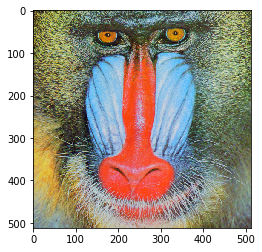

In [11]:
plt.imshow(mandrill)
plt.show()

Let's reshape it into a 2D array. This gives us a long array of [RGB pixel values](https://en.wikipedia.org/wiki/RGB_color_model).

In [12]:
w, h, d = original_shape = tuple(mandrill.shape)
image_array = np.reshape(mandrill, (w * h, d))
image_array

array([[0.64313725, 0.58823529, 0.27843137],
       [0.24705882, 0.22352941, 0.12156863],
       [0.29411765, 0.16862745, 0.03921569],
       ...,
       [0.01960784, 0.03137255, 0.01960784],
       [0.00784314, 0.01960784, 0.        ],
       [0.01568627, 0.01960784, 0.00784314]])


* After running `KMeans`, you should have 16 centroids, where each centroid is a vector of 3 dimensions corresponding to the 16 quantized RGB values you need. Ensure that this is the case by looking at the `kmeans.cluster_centers_`, assuming `kmeans` is the result of your clustering.
* Replace the values in `image_array` with the centroid values. To know which cluster each pixel of `image_array` falls in, you can run `.predict(image_array)` on the result of your `KMeans` clustering. Then from the cluster, you can get the centroid value from `.cluster_centters_` mentioned above.
* Recreate the image data to be displayed. Show it with `plt.imshow()`. How does it look? By how much have we compressed the results?
* Try a few different values of *k* and compare the results.

In [13]:
# Your code here…

(Your response here)